## Project Goals
Current task is to create the most effective regression model to predict churn and find which factors are most associated with churn. 

## Walk though
Initial stages begin with importing, preparing, and exploring data. 
Middle statges consist of indepth feature enginnering.
Final stages will consist of the creation of a model and presentiations for model, and summation. 

Currently hypothosis is: low tenure leads to churn.


In [8]:
from acquire import get_telco
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, QuantileTransformer, PowerTransformer
from sklearn.linear_model import LinearRegression, LassoCV
from math import sqrt
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
import matplotlib
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from pydataset import data
import statsmodels.api as sm
import re
import multiprocessing as mp


In [9]:
df = get_telco()

In [5]:
import pandas_profiling

In [4]:
pandas_profiling.ProfileReport(df)

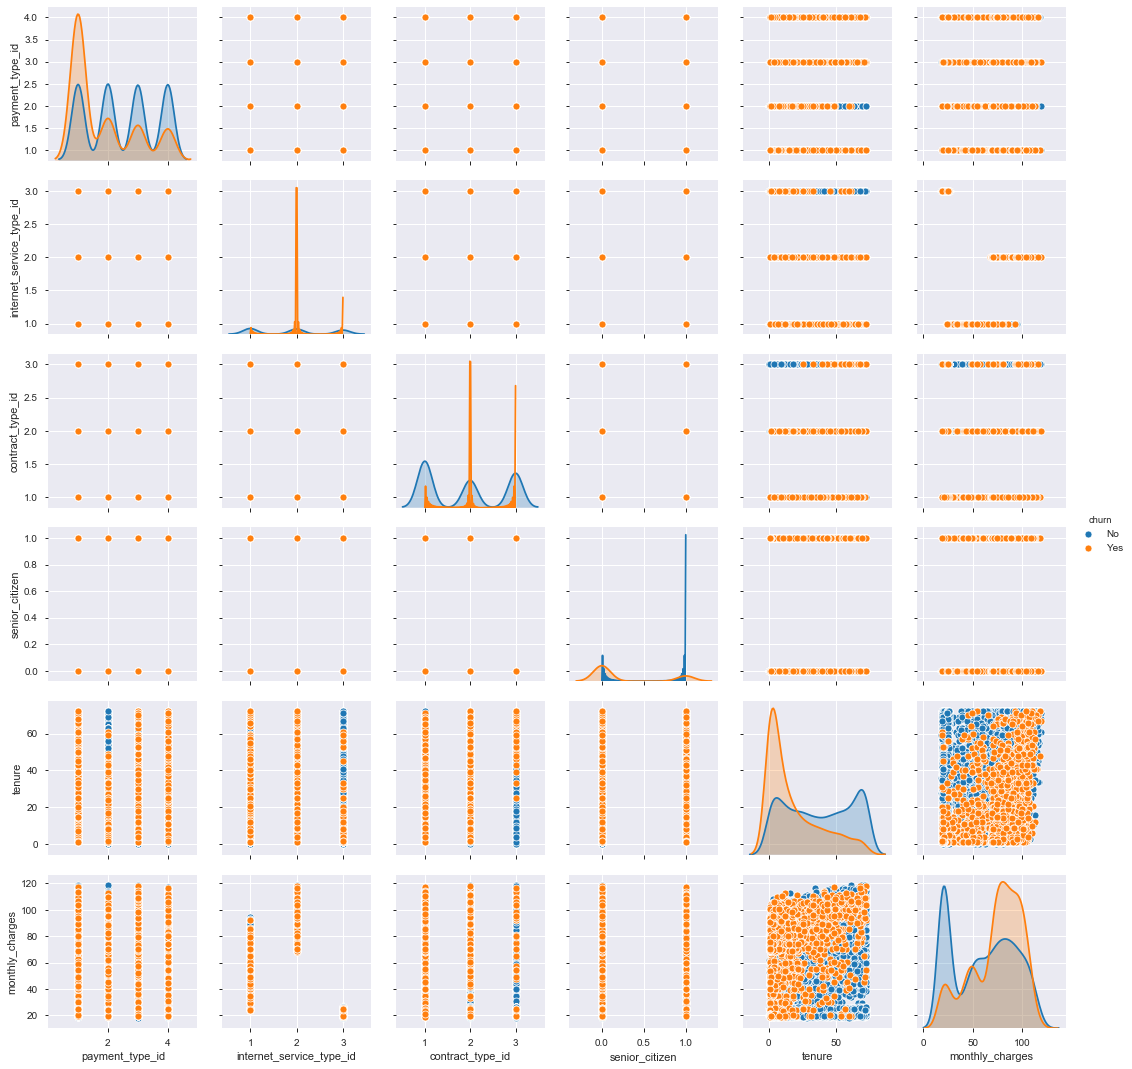

In [6]:
sns.pairplot(data=df, hue="churn")

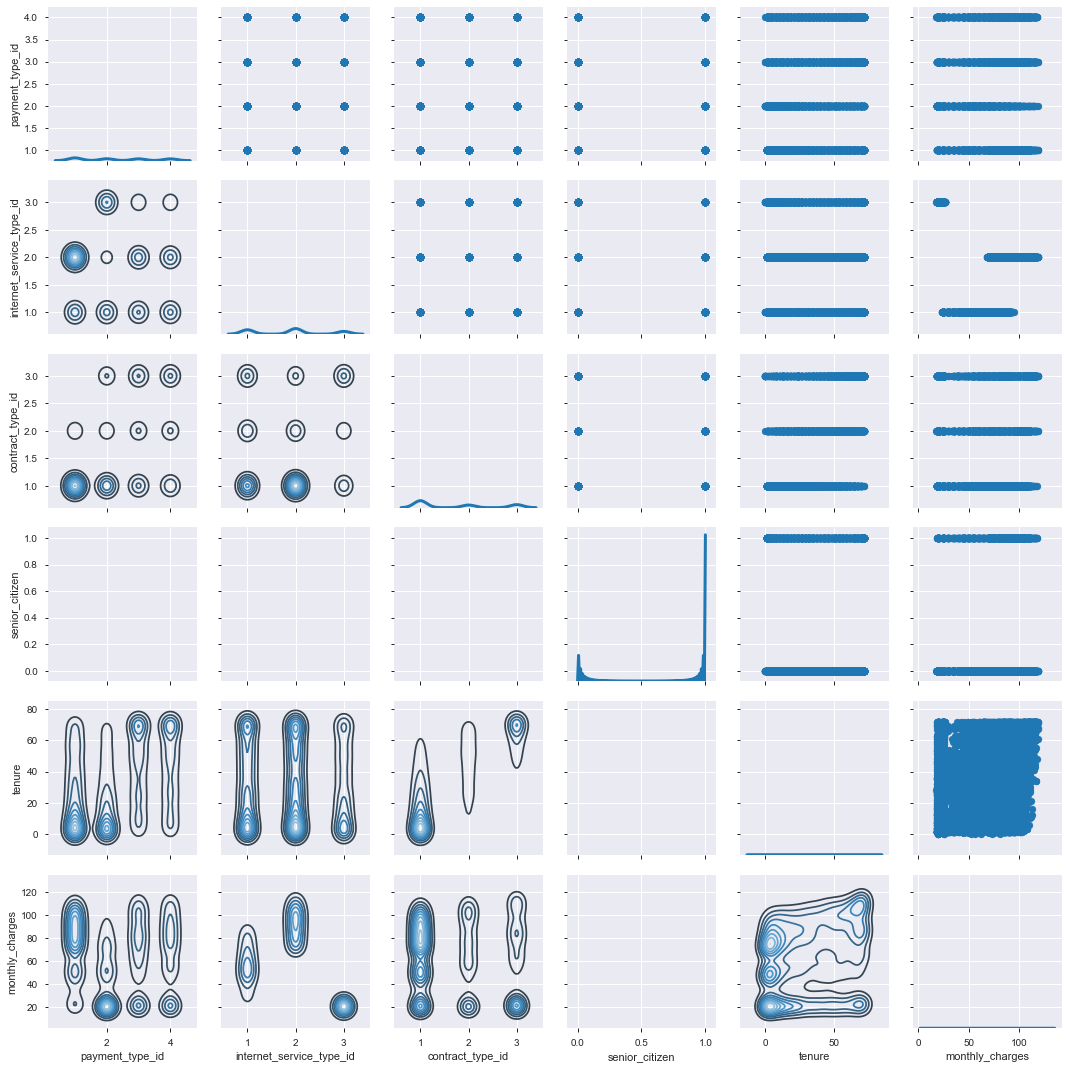

In [7]:
g = sns.PairGrid(df)
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot, cmap="Blues_d")
g = g.map_diag(sns.kdeplot, lw=3, legend=False)

## Data Preperation

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
df = get_telco()
df["tenure_years"] = [n/12 for n in df.tenure]
df.drop(columns = ["customer_id", "payment_type_id", "internet_service_type_id", "contract_type_id"], inplace=True)
for col in ['gender', 'senior_citizen', 'partner', 'dependents',\
    'phone_service', 'multiple_lines', 'online_security', 'online_backup',\
    'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',\
    'paperless_billing', 'churn','contract_type', 'internet_service_type', 'payment_type']:
    df[col] = df[col].astype('category')
df["total_charges"] = pd.to_numeric(df["total_charges"], errors= "coerce").dropna()
for col in ["tenure_years", "monthly_charges", "tenure"]:
    df[col] = df[col].astype("float")

## Above:
Created tenure_years, replacing objects astype(category) and astype(float)

In [11]:
df_dict = df.to_dict(orient='records')
from sklearn.feature_extraction import DictVectorizer
dv_df = DictVectorizer(sparse=False)
df_encoded = dv_df.fit_transform(df_dict)
df_machine_model = pd.get_dummies(df, prefix_sep='_', drop_first=True)
df_machine_model

tenure  monthly_charges  total_charges  tenure_years  gender_Male  \
0        9.0            59.90         542.40      0.750000            1   
1        9.0            69.40         571.45      0.750000            0   
2        7.0            48.20         340.35      0.583333            0   
3        1.0            25.10          25.10      0.083333            1   
4        1.0            30.50          30.50      0.083333            0   
5        2.0            49.25          91.10      0.166667            1   
6       29.0            45.00        1242.45      2.416667            1   
7        1.0            44.30          44.30      0.083333            1   
8        6.0            50.35         314.55      0.500000            0   
9       30.0            64.50        1888.45      2.500000            1   
10      16.0            71.40        1212.10      1.333333            1   
11      37.0            40.20        1448.80      3.083333            1   
12      26.0            45.80        1147.00      2.166667            0   
13      22.0            54.20        1152.70      1.833333            1   
14      30.0            74.75        2111.30      2.500000            1   
15      22.0            50.35        1098.85      1.833333            0   
16      52.0            48.80        2555.05      4.333333            1   
17       5.0            47.15         223.15      0.416667            1   
18       2.0            44.30          89.30      0.166667            0   
19      19.0            59.55        1144.60      1.583333            1   
20       1.0            50.10          50.10      0.083333            0   
21      32.0            62.45        2045.55      2.666667            0   
22       9.0            72.90         651.40      0.750000            0   
23       7.0            58.85         465.70      0.583333            1   
24       8.0            54.40         475.10      0.666667            1   
25      12.0            29.30         355.90      1.000000            0   
26      27.0            54.75        1510.30      2.250000            1   
27      35.0            60.55        1982.60      2.916667            0   
28      54.0            86.20        4524.05      4.500000            0   
29       5.0            63.95         318.10      0.416667            1   
30       6.0            49.45         314.60      0.500000            0   
31       6.0            55.15         322.90      0.500000            0   
32       3.0            58.70         168.60      0.250000            0   
33       2.0            45.35          89.50      0.166667            1   
34       1.0            48.55          48.55      0.083333            1   
35      11.0            45.90         521.90      0.916667            1   
36       1.0            50.15          50.15      0.083333            0   
37       3.0            44.60         122.70      0.250000            0   
38       1.0            34.70          34.70      0.083333            0   
39      22.0            57.95        1271.80      1.833333            1   
40      20.0            64.40        1398.60      1.666667            1   
41      23.0            55.30        1284.20      1.916667            1   
42       3.0            60.25         170.50      0.250000            0   
43       1.0            44.40          44.40      0.083333            0   
44       8.0            25.50         215.20      0.666667            1   
45       9.0            49.20         447.90      0.750000            1   
46      15.0            49.00         749.25      1.250000            1   
47      44.0            50.15        2139.10      3.666667            0   
48      48.0            45.30        2145.00      4.000000            0   
49      10.0            56.75         503.25      0.833333            1   
50       5.0            54.20         308.25      0.416667            0   
51      52.0            50.50        2566.30      4.333333            0   
52       2.0            62.15  

## Above:
Creating df_machine_model to hold machine readable model for regression creation

In [6]:
df

gender senior_citizen partner dependents  tenure phone_service  \
0       Male              0      No         No     9.0           Yes   
1     Female              0      No        Yes     9.0           Yes   
2     Female              1      No         No     7.0           Yes   
3       Male              1      No         No     1.0            No   
4     Female              0     Yes        Yes     1.0            No   
5       Male              1      No         No     2.0           Yes   
6       Male              0      No        Yes    29.0            No   
7       Male              0      No         No     1.0           Yes   
8     Female              0     Yes         No     6.0           Yes   
9       Male              0      No         No    30.0           Yes   
10      Male              0      No         No    16.0           Yes   
11      Male              0     Yes        Yes    37.0            No   
12    Female              0      No        Yes    26.0            No   
13      Male              0     Yes         No    22.0           Yes   
14      Male              1      No         No    30.0           Yes   
15    Female              0      No         No    22.0            No   
16      Male              1      No         No    52.0            No   
17      Male              0      No         No     5.0           Yes   
18    Female              1      No         No     2.0           Yes   
19      Male              0      No         No    19.0           Yes   
20    Female              0      No         No     1.0           Yes   
21    Female              0     Yes        Yes    32.0           Yes   
22    Female              0      No        Yes     9.0           Yes   
23      Male              0     Yes        Yes     7.0            No   
24      Male              0     Yes        Yes     8.0           Yes   
25    Female              1     Yes        Yes    12.0            No   
26      Male              0     Yes        Yes    27.0           Yes   
27    Female              0      No         No    35.0           Yes   
28    Female              0     Yes        Yes    54.0           Yes   
29      Male              0      No         No     5.0           Yes   
30    Female              0      No         No     6.0           Yes   
31    Female              0      No         No     6.0           Yes   
32    Female              0     Yes        Yes     3.0           Yes   
33      Male              0      No         No     2.0           Yes   
34      Male              0      No         No     1.0           Yes   
35      Male              0     Yes         No    11.0           Yes   
36    Female              0      No         No     1.0           Yes   
37    Female              0      No         No     3.0           Yes   
38    Female              0      No         No     1.0            No   
39      Male              0     Yes        Yes    22.0           Yes   
40      Male              0      No         No    20.0           Yes   
41      Male              0      No        Yes    23.0           Yes   
42    Female              0      No         No     3.0           Yes   
43    Female              0      No         No     1.0           Yes   
44      Male              0      No        Yes     8.0            No   
45      Male              1      No         No     9.0           Yes   
46      Male              0      No         No    15.0           Yes   
47    Female              0      No         No    44.0           Yes   
48    Female              0     Yes         No    48.0            No   
49      Male              0      No         No    10.0           Yes   
50    Female              0      No         No     5.0           Yes   
51    Female              1      No         No    52.0            No   
52    Female              0     Yes         No     2.0           Yes   
53      Male              0      No         No    13.0           Yes   
54    Female              0      No         No

In [12]:
df_machine_model["pd"] = df_machine_model.partner_Yes + df_machine_model.dependents_Yes
df_machine_model["phone_multiple"] = df_machine_model.phone_service_Yes + df_machine_model.multiple_lines_Yes
df_machine_model.dropna(inplace=True)
for col in ['partner', 'dependents',\
       'phone_service', 'multiple_lines', 'online_security',\
            'online_backup','device_protection']:
    df[col] = df[col].replace({"Yes": 1, "No": 0, "No phone service": 2})
df_machine_model.churn_Yes
df["pd"] = df.partner + df.dependents
df["phone_multiple"] = df.phone_service + df.multiple_lines

In [13]:
train, test = train_test_split(df_machine_model, train_size = .75, random_state = 123)
X_train = train.drop(columns = "churn_Yes")
X_test = test.drop(columns = "churn_Yes")
y_train = train.churn_Yes
y_test = test.churn_Yes

In [14]:

scaler = StandardScaler(copy=True, with_mean=True, with_std=True).fit(train)
train_scaled_data = pd.DataFrame(scaler.transform(train))
test_scaled_data = pd.DataFrame(scaler.transform(test))
new_col = ['tenure', 'monthly_charges', 'total_charges', 'tenure_years',\
       'gender_Male', 'senior_citizen_1', 'partner_Yes', 'dependents_Yes',\
       'phone_service_Yes', 'multiple_lines_No phone service',\
       'multiple_lines_Yes', 'online_security_No internet service',\
       'online_security_Yes', 'online_backup_No internet service',\
       'online_backup_Yes', 'device_protection_No internet service',\
       'device_protection_Yes', 'tech_support_No internet service',\
       'tech_support_Yes', 'streaming_tv_No internet service',\
       'streaming_tv_Yes', 'streaming_movies_No internet service',\
       'streaming_movies_Yes', 'paperless_billing_Yes', 'churn_Yes',\
       'contract_type_One year', 'contract_type_Two year',\
       'internet_service_type_Fiber optic', 'internet_service_type_None',\
       'payment_type_Credit card (automatic)', 'payment_type_Electronic check',\
       'payment_type_Mailed check', 'pd', 'phone_multiple']
train_scaled_data.columns = new_col
test_scaled_data.columns = new_col
X_train_scaled = train_scaled_data.drop(columns = "churn_Yes")
X_test_scaled = test_scaled_data.drop(columns = "churn_Yes")
y_train_scaled = train_scaled_data.churn_Yes
y_test_scaled = test_scaled_data.churn_Yes
test_scaled_data

tenure  monthly_charges  total_charges  tenure_years  gender_Male  \
0     1.117680        -1.455401      -0.451599      1.117680     0.983451   
1    -1.251057        -0.521713      -0.972239     -1.251057    -1.016827   
2     1.566923         0.596387       1.561591      1.566923    -1.016827   
3     1.321881        -1.508565      -0.429792      1.321881    -1.016827   
4     1.566923         1.307452       2.259508      1.566923    -1.016827   
5     1.607763         0.001618       1.070968      1.607763     0.983451   
6    -1.291897         0.505012      -0.977161     -1.291897     0.983451   
7    -0.760974         0.935306      -0.422067     -0.760974     0.983451   
8    -0.597612         0.995115      -0.267348     -0.597612     0.983451   
9     0.545916        -1.506904      -0.589500      0.545916    -1.016827   
10    1.485242         1.302468       2.274803      1.485242    -1.016827   
11   -1.291897        -0.373851      -0.988836     -1.291897     0.983451   
12   -0.393411        -0.159535      -0.391808     -0.393411     0.983451   
13   -1.210217         0.368780      -0.899183     -1.210217    -1.016827   
14    1.607763        -1.470354      -0.349320      1.607763    -1.016827   
15    0.627596        -1.480322      -0.558998      0.627596    -1.016827   
16   -1.291897         0.337214      -0.979390     -1.291897    -1.016827   
17   -0.066689         1.285854       0.341158     -0.066689     0.983451   
18   -0.760974        -0.001705      -0.597071     -0.760974    -1.016827   
19    1.526082         1.691228       2.505205      1.526082     0.983451   
20   -0.230050        -0.176149      -0.301028     -0.230050     0.983451   
21   -0.025848         0.873835       0.291741     -0.025848    -1.016827   
22    0.137513         0.701053       0.313393      0.137513    -1.016827   
23   -1.291897         0.330568      -0.979478     -1.291897     0.983451   
24    0.219193        -1.478660      -0.652801      0.219193    -1.016827   
25   -1.128536        -1.505242      -0.974468     -1.128536     0.983451   
26    0.300874        -0.270847       0.037744      0.300874    -1.016827   
27    1.240200         0.237532       0.964783      1.240200     0.983451   
28   -0.189210         0.392039      -0.100731     -0.189210     0.983451   
29    0.954318        -1.339106      -0.380485      0.954318     0.983451   
30    0.219193         0.647889       0.428583      0.219193    -1.016827   
31    1.566923         0.646228       1.617056      1.566923     0.983451   
32    0.464235         1.309113       0.972044      0.464235    -1.016827   
33    0.995159        -0.661268       0.123314      0.995159     0.983451   
34   -0.107529        -0.008351      -0.178842     -0.107529     0.983451   
35   -1.291897         0.179384      -0.981487     -1.291897    -1.016827   
36    1.566923        -0.611427       0.467825      1.566923     0.983451   
37   -0.556772        -0.661268      -0.618016     -0.556772    -1.016827   
38    0.096672        -0.315704      -0.163105      0.096672     0.983451   
39   -1.291897        -1.498597      -1.003779     -1.291897     0.983451   
40    0.872638         1.307452       1.479751      0.872638    -1.016827   
41   -1.087696         0.192675      -0.820896     -1.087696    -1.016827   
42   -0.924335        -1.481983      -0.914986     -0.924335    -1.016827   
43   -1.251057        -1.498597      -0.998680     -1.251057     0.983451   
44    0.995159        -1.483645      -0.532314      0.995159    -1.016827   
45    0.178353         0.186029       0.114464      0.178353     0.983451   
46    1.607763        -1.287603      -0.228480      1.607763    -1.016827   
47   -0.883494         0.338875      -0.647967     -0.883494     0.983451   
48   -0.924335        -0.083112      -0.741881     -0.924335     0.983451   
49    1.158520         1.789248       2.238959      1.158520    -1.016827   
50    1.566923         0.285711       1.262878      1.566923     0.983451   
51  

## Prepare summation
There was nan's while converting total_charges, due to the low quantity (~<1% of data), its impact for removal was deemed to be insigificant, and outweighted other considered options. 

Nothing to report regarding new takeaways from the data, several columns were removed due to the data already existing within the data frame. 


#### Could the month in which they signed up influence churn? 

(0, 72)

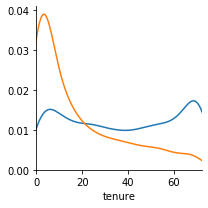

In [33]:
g1 = sns.FacetGrid(df, hue="churn")
g1 = g1.map(sns.kdeplot, "tenure")
plt.xlim(0,72)

## Above:
Could the month in which they signed up influence churn?
Churn doesn't seem to be driven by the month they were onboarded, more so tenure. 

(0, 72)

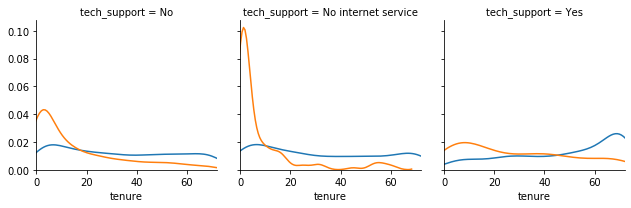

In [84]:
g2 = sns.FacetGrid(df,col = "tech_support", hue="churn")
g2 = g2.map(sns.kdeplot, "tenure")
plt.xlim(0,72)

((array([-3.72305933, -3.4929284 , -3.36634644, ...,  3.36634644,
          3.4929284 ,  3.72305933]),
  array([ 0.,  0.,  0., ..., 72., 72., 72.])),
 (23.362198500355383, 32.37114865824223, 0.9508505173148816))

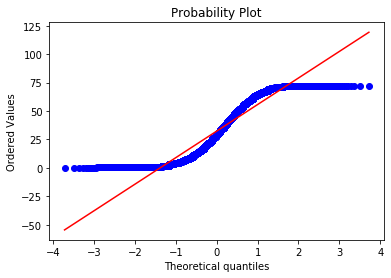

In [42]:
from scipy import stats
stats.probplot(df.tenure,plot=plt)

In [55]:
x2 = df[df.payment_type == "Mailed check"].tenure
x1 = df[df.payment_type != "Mailed check"].tenure
stats.ttest_ind(x1,x2)

Ttest_indResult(statistic=20.182292141592303, pvalue=4.192443614858306e-88)

(0, 72)

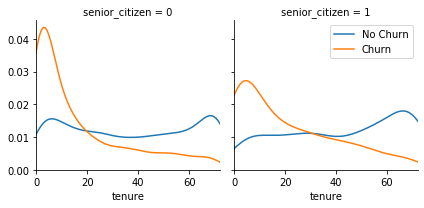

In [92]:
g3 = sns.FacetGrid(df,col = "senior_citizen", hue="churn")
g3 = g3.map(sns.kdeplot, "tenure")
plt.legend(["No Churn", "Churn"])
plt.xlim(0,72)

(0, 72)

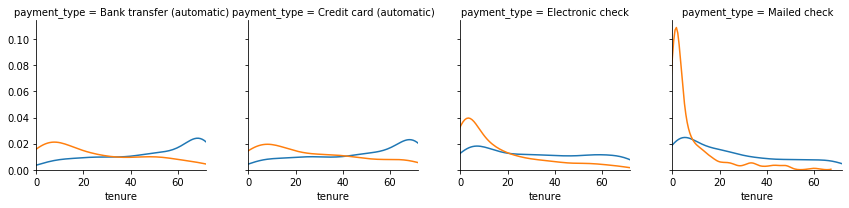

In [91]:
g3 = sns.FacetGrid(df,col = "payment_type", hue="churn")
g3 = g3.map(sns.kdeplot, "tenure")
plt.xlim(0,72)

(0, 72)

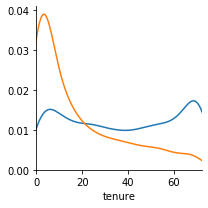

In [37]:
g3 = sns.FacetGrid(df, hue="churn")
g3 = g3.map(sns.kdeplot, "tenure")
plt.xlim(0,72)

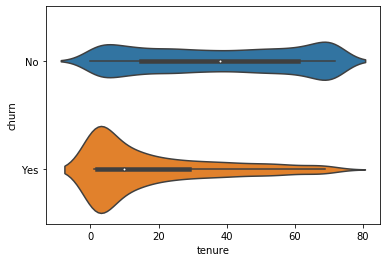

In [35]:
g4 = sns.violinplot(x="tenure", y="churn", data=df)

In [58]:
df_compare = df[df.internet_service_type == "Fiber optic"][df.payment_type == "Electronic check"]
for col in ["churn"]:
    df_compare[col] = df_compare[col].replace({"Yes": 1, "No": 0})

In [59]:
df_compare["charges_split"] = pd.cut(df_compare["total_charges"], bins = 4)

In [55]:
df_compare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1595 entries, 2421 to 5514
Data columns (total 24 columns):
gender                   1595 non-null category
senior_citizen           1595 non-null category
partner                  1595 non-null object
dependents               1595 non-null object
tenure                   1595 non-null float64
phone_service            1595 non-null object
multiple_lines           1595 non-null int64
online_security          1595 non-null object
online_backup            1595 non-null object
device_protection        1595 non-null object
tech_support             1595 non-null category
streaming_tv             1595 non-null category
streaming_movies         1595 non-null category
paperless_billing        1595 non-null category
monthly_charges          1595 non-null float64
total_charges            1595 non-null float64
churn                    1595 non-null int64
contract_type            1595 non-null category
internet_service_type    1595 non-null category

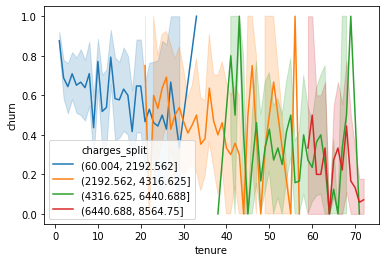

In [60]:
g6 = sns.lineplot(x="tenure", y="churn", hue="charges_split", data=df_compare)

### Are there features that indicate a higher propensity to churn?
In short yes, from the surface level analysis I've been able to complete, it does appear that with the features provided, there has been some correlation with some features over others in relation to churn. 
### Like type of internet service, type of phone service, online security and backup, senior citizens, paying more than x% of customers with the same services, etc.?


